<a href="https://colab.research.google.com/github/fadhilahmad11/Machine-Learning/blob/main/05.%20Week%205/EDA_and_Data_Visualization_Netflix_csv_W5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Data loading



In [1]:
import pandas as pd

from google.colab import files
uploaded = files.upload()

df = pd.read_csv('netflix_titles.csv')
display(df.head())

Saving netflix_titles.csv to netflix_titles.csv


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


## Data exploration



In [2]:
print("Data Shape:", df.shape)

print("\nData Types:\n", df.dtypes)

missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100
print("\nMissing Values:\n", missing_values)
print("\nMissing Value Percentage:\n", missing_percentage)

print("\nSummary Statistics:\n", df.describe(include='number'))

categorical_features = ['type', 'country', 'rating', 'listed_in']
for feature in categorical_features:
    print(f"\nValue counts for {feature}:\n{df[feature].value_counts(dropna=False)}")

print(f"\nValue counts for release_year:\n{df['release_year'].value_counts(dropna=False)}")

unique_values = df.nunique()
print("\nUnique Values:\n", unique_values)

Data Shape: (8807, 12)

Data Types:
 show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

Missing Values:
 show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

Missing Value Percentage:
 show_id          0.000000
type             0.000000
title            0.000000
director        29.908028
cast             9.367549
country          9.435676
date_added       0.113546
release_year     0.000000
rating           0.045418
duration         0.034064
listed_in        0.000000
description      0.000000
dtype: float64

Summary Statistics:
        releas

## Data cleaning



In [3]:
import pandas as pd

df_cleaned = df.copy()
df_cleaned['director'] = df_cleaned['director'].fillna('Unknown')
df_cleaned['cast'] = df_cleaned['cast'].fillna('Unknown')
most_frequent_country = df_cleaned['country'].mode()[0]
df_cleaned['country'] = df_cleaned['country'].fillna(most_frequent_country)
df_cleaned.dropna(subset=['date_added'], inplace=True)
most_frequent_rating = df_cleaned['rating'].mode()[0]
df_cleaned['rating'] = df_cleaned['rating'].fillna(most_frequent_rating)

country_mapping = {
    "United States": "USA",
    "United Kingdom": "UK",
}
df_cleaned['country'] = df_cleaned['country'].replace(country_mapping)

df_cleaned.drop_duplicates(inplace=True)

display(df_cleaned.head())

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,USA,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",USA,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,Unknown,Unknown,USA,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


## Feature engineering



In [4]:
import pandas as pd

df_cleaned['date_added'] = pd.to_datetime(df_cleaned['date_added'], format='%B %d, %Y', errors='coerce')
df_cleaned['month_added'] = df_cleaned['date_added'].dt.month
df_cleaned['year_added'] = df_cleaned['date_added'].dt.year
df_cleaned['quarter_added'] = df_cleaned['date_added'].dt.quarter

genres = ["Comedies", "Dramas", "Documentaries", "International Movies", "Thrillers", "Romantic Movies", "Children & Family Movies"]
for genre in genres:
    df_cleaned[f"is_{genre.lower().replace(' ', '_').replace('&', 'and')}_genre"] = df_cleaned['listed_in'].str.contains(genre, case=False, na=False).astype(int)


df_cleaned['description_word_count'] = df_cleaned['description'].str.split().str.len()

df_cleaned = pd.get_dummies(df_cleaned, columns=['country'], prefix='country', dummy_na=False)

display(df_cleaned.head())

,show_id,type,title,director,cast,date_added,release_year,rating,duration,listed_in,...,"country_Uruguay, Argentina, Germany, Spain","country_Uruguay, Argentina, Spain","country_Uruguay, Germany","country_Uruguay, Guatemala","country_Uruguay, Spain, Mexico",country_Venezuela,"country_Venezuela, Colombia",country_Vietnam,country_West Germany,country_Zimbabwe
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,2021-09-25,2020,PG-13,90 min,Documentaries,...,False,False,False,False,False,False,False,False,False,False
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries",...,False,False,False,False,False,False,False,False,False,False
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",...,False,False,False,False,False,False,False,False,False,False
3,s4,TV Show,Jailbirds New Orleans,Unknown,Unknown,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV",...,False,False,False,False,False,False,False,False,False,False
4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",...,False,False,False,False,False,False,False,False,False,False


## Data visualization


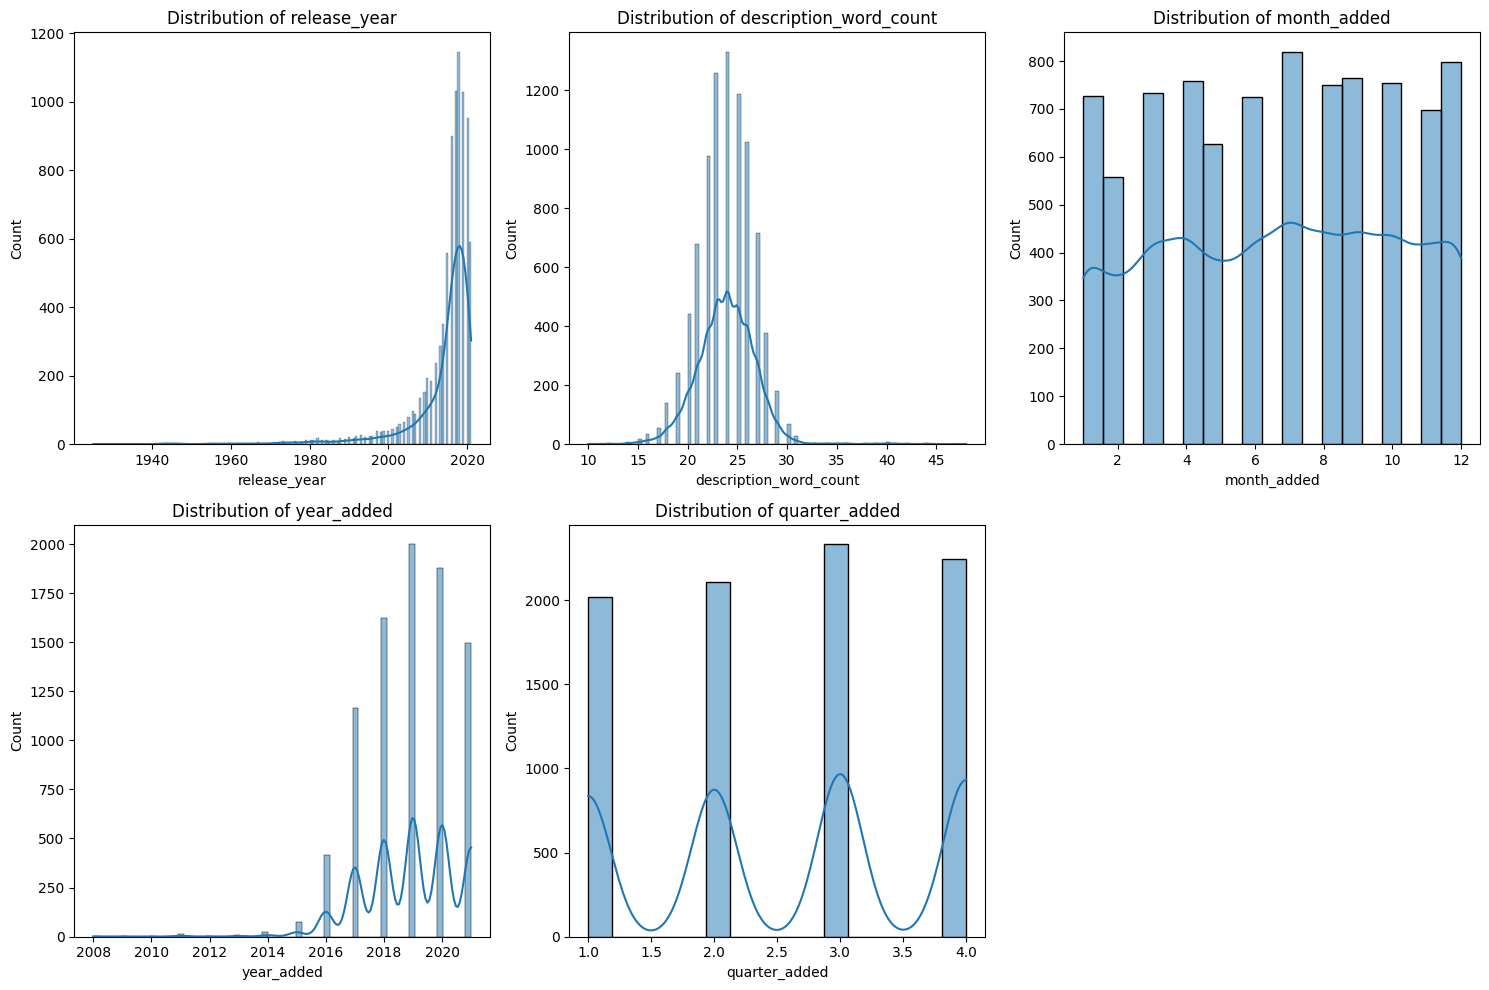

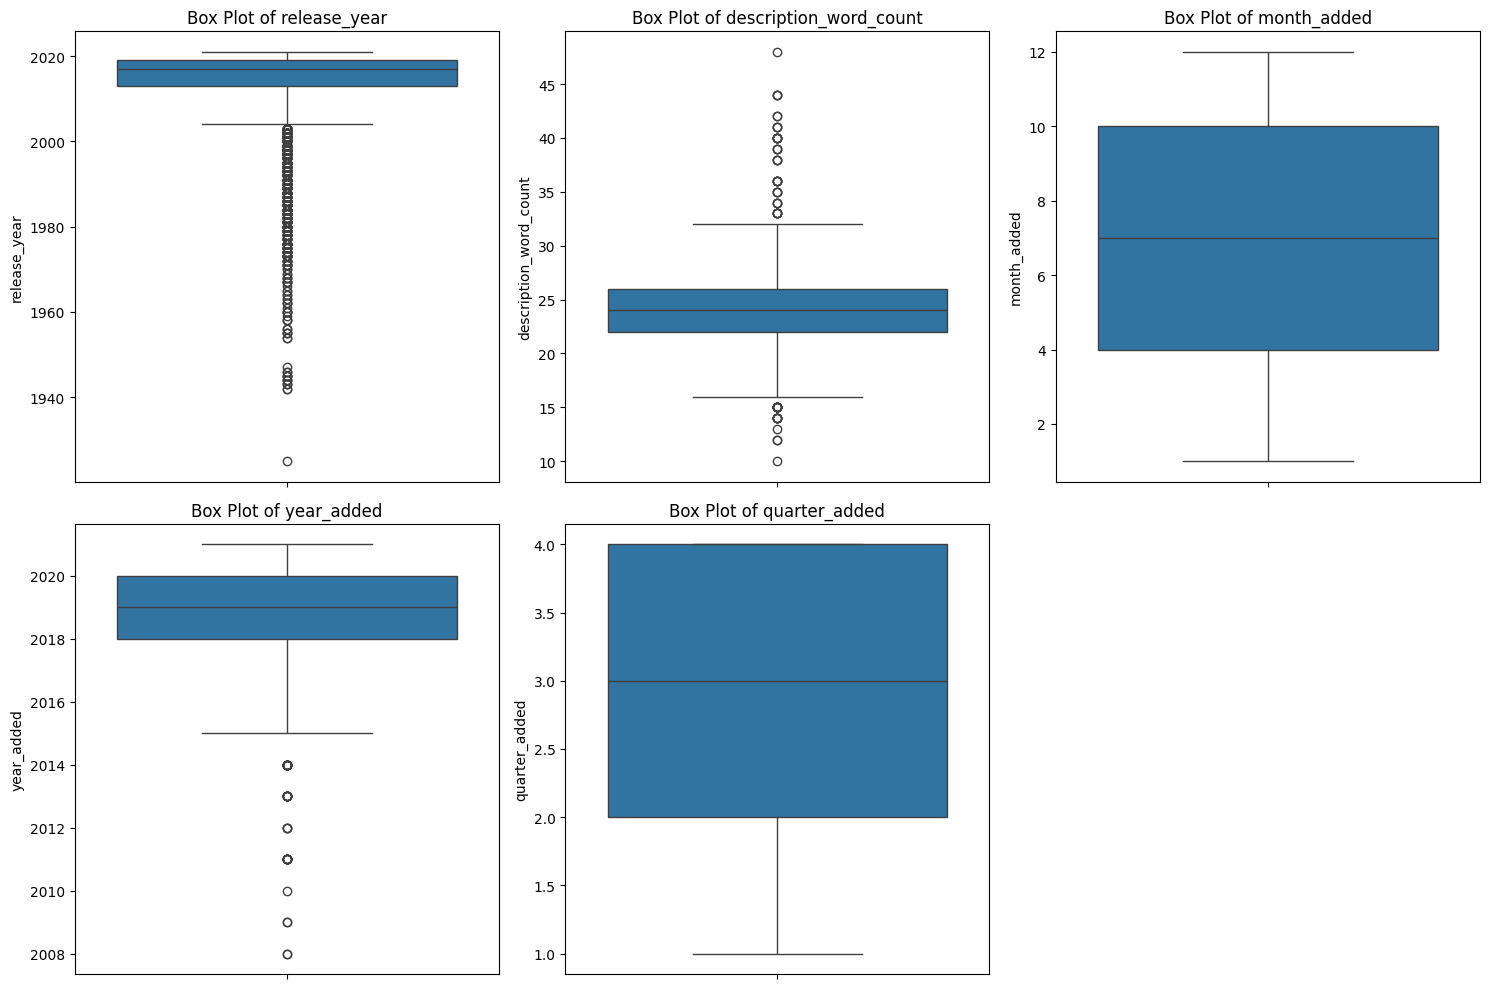

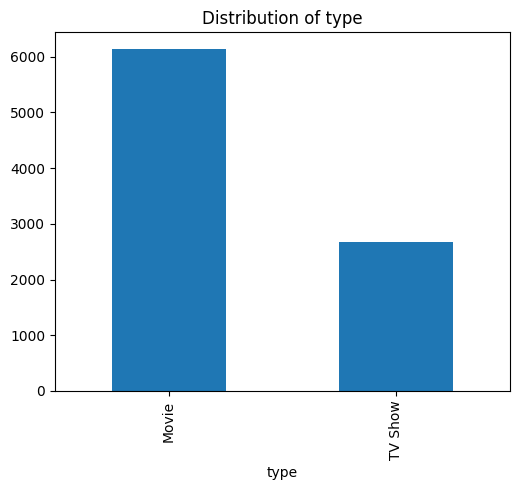

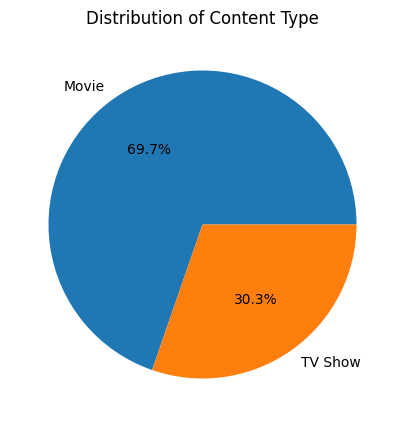

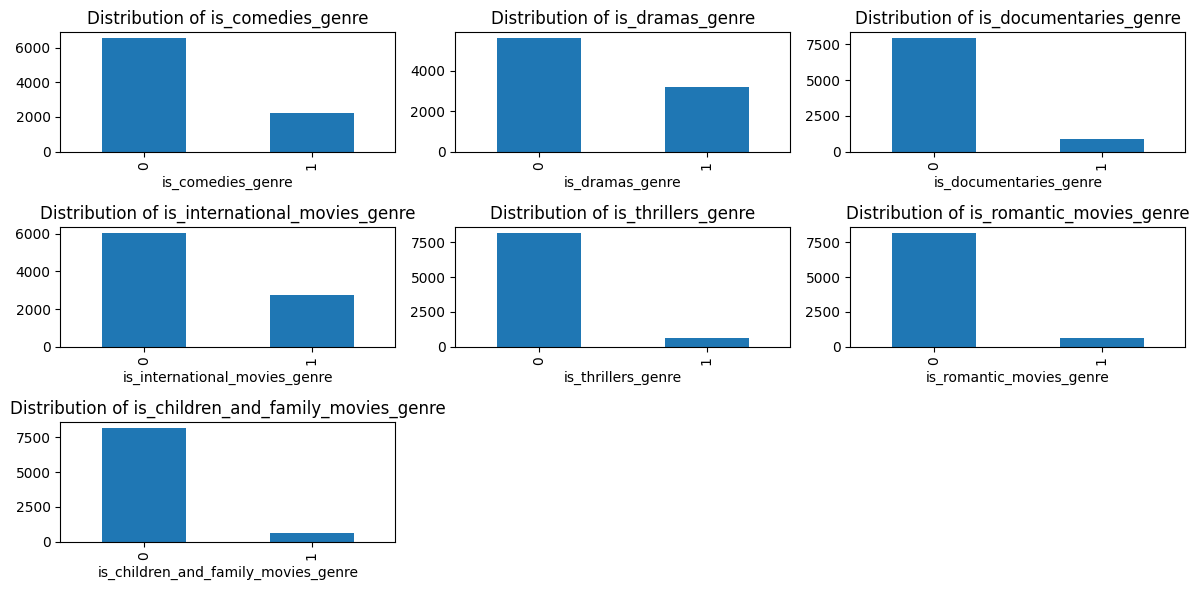

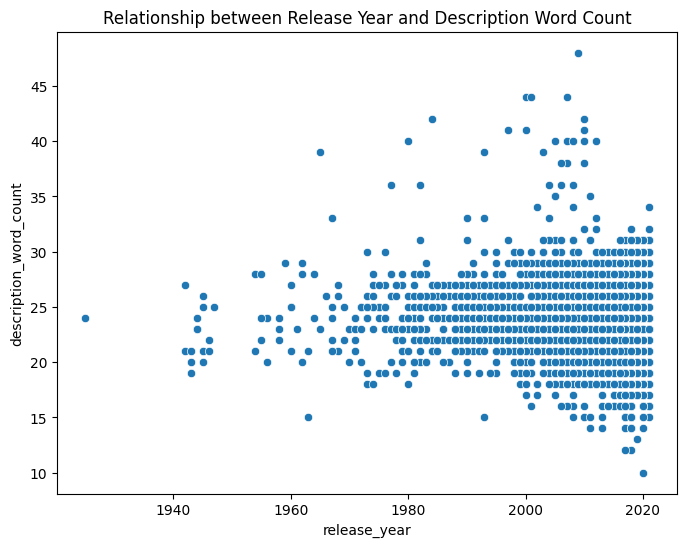

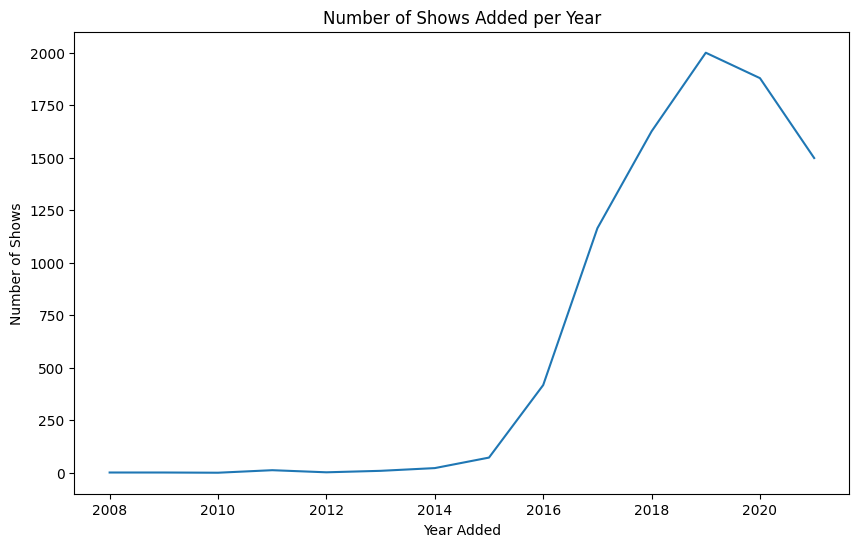

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

numerical_features = ['release_year', 'description_word_count', 'month_added', 'year_added', 'quarter_added']
plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features):
    plt.subplot(2, 3, i + 1)
    sns.histplot(df_cleaned[feature], kde=True)
    plt.title(f'Distribution of {feature}')

plt.tight_layout()
plt.show()

plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(y=df_cleaned[feature])
    plt.title(f'Box Plot of {feature}')

plt.tight_layout()
plt.show()

categorical_features = ['type']
plt.figure(figsize=(10, 5))
for i, feature in enumerate(categorical_features):
    plt.subplot(1, 2, i + 1)
    df_cleaned[feature].value_counts().plot(kind='bar')
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 5))
df_cleaned['type'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Distribution of Content Type')
plt.ylabel('')
plt.show()

genre_features = [col for col in df_cleaned.columns if col.startswith('is_')]
plt.figure(figsize=(12,6))
for i, genre in enumerate(genre_features):
  plt.subplot(3,3, i+1)
  df_cleaned[genre].value_counts().plot(kind='bar')
  plt.title(f'Distribution of {genre}')
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 6))
sns.scatterplot(x='release_year', y='description_word_count', data=df_cleaned)
plt.title('Relationship between Release Year and Description Word Count')
plt.show()

plt.figure(figsize=(10, 6))
df_cleaned.groupby('year_added')['show_id'].count().plot()
plt.title('Number of Shows Added per Year')
plt.xlabel('Year Added')
plt.ylabel('Number of Shows')
plt.show()


## Data analysis


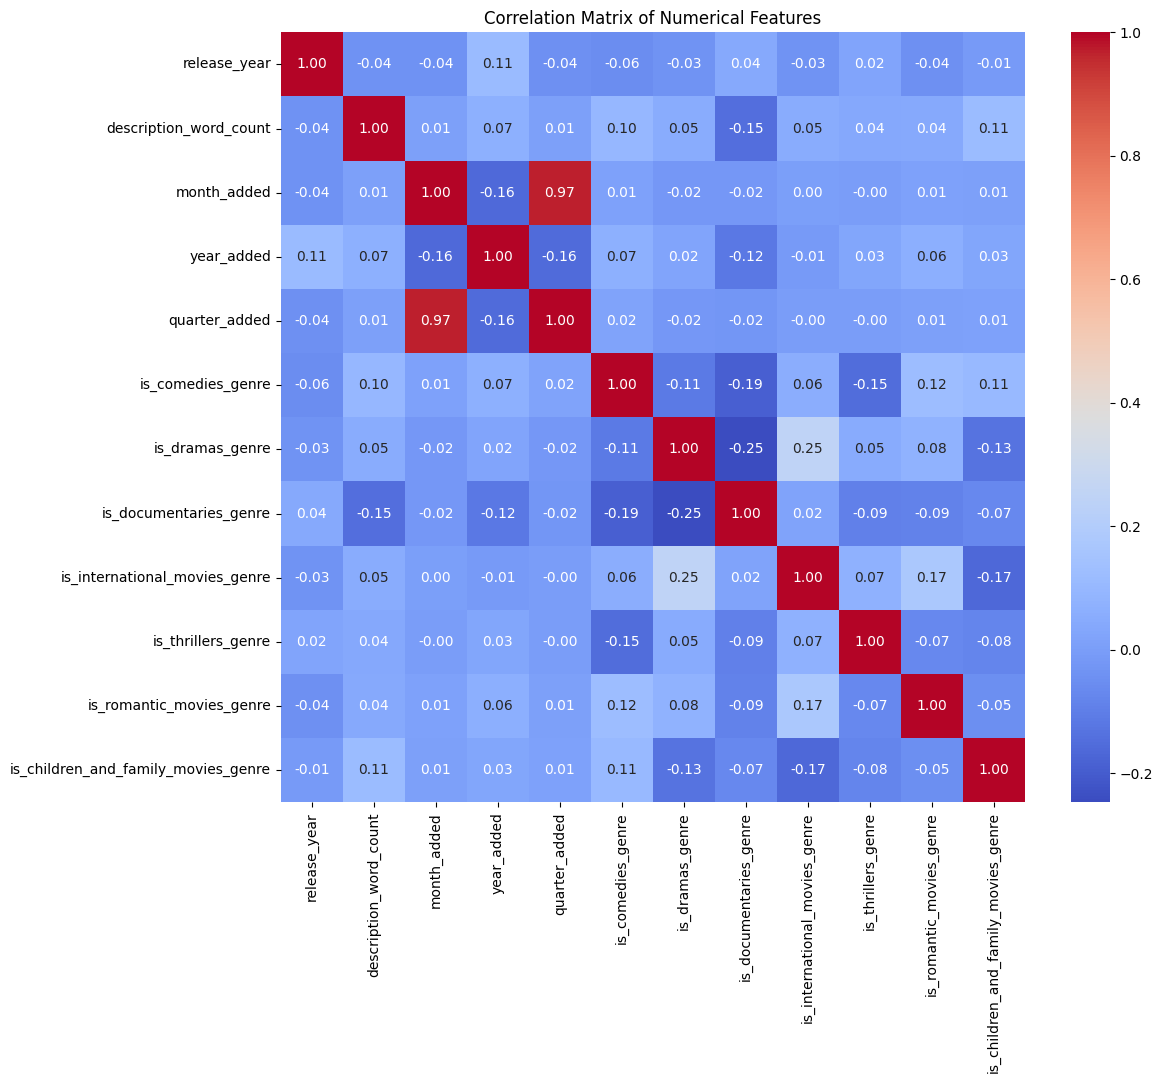

Strong Correlations with Release Year:
 release_year    1.0
Name: release_year, dtype: float64

T-test for description word count (Movie vs. TV Show): t-statistic=8.81, p-value=0.000

ANOVA for release year (Comedies vs. Dramas): F-statistic=3.33, p-value=0.068


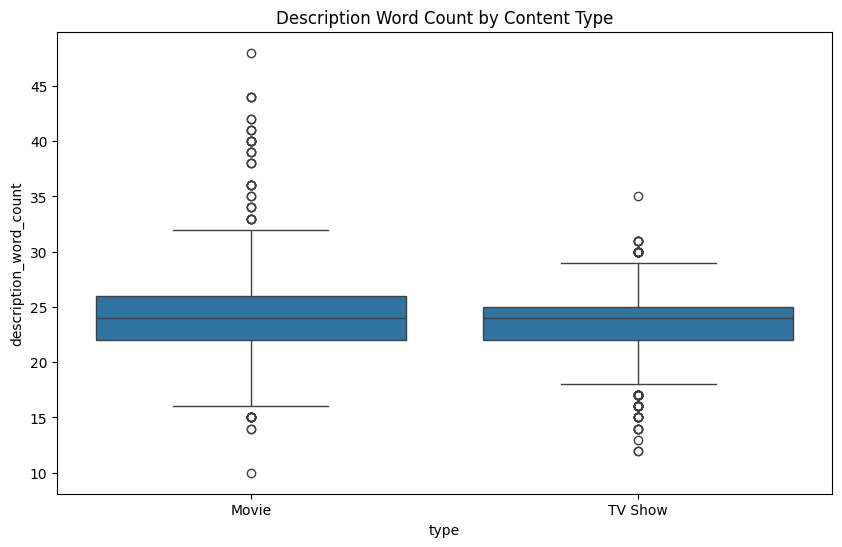

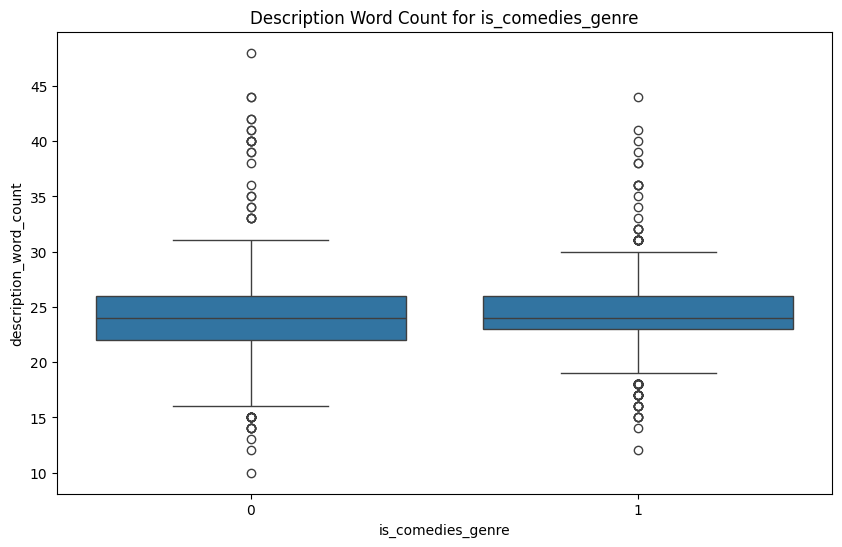

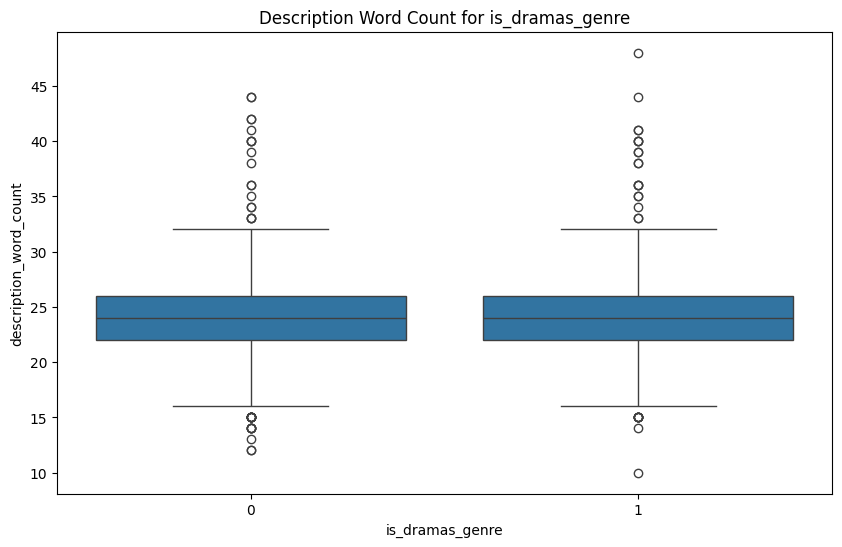

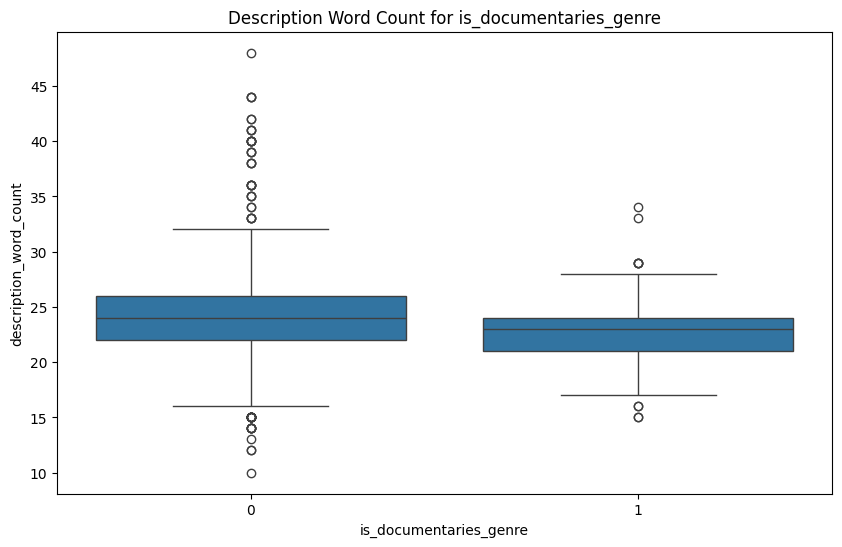

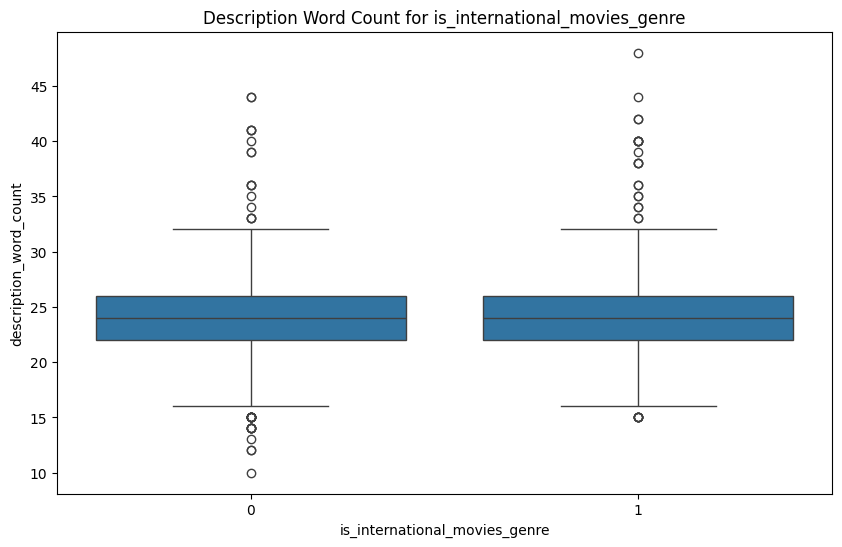

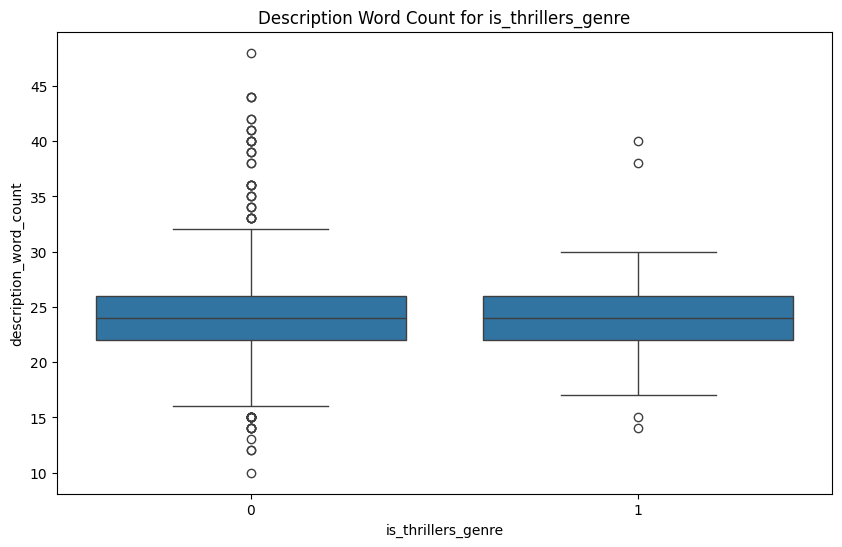

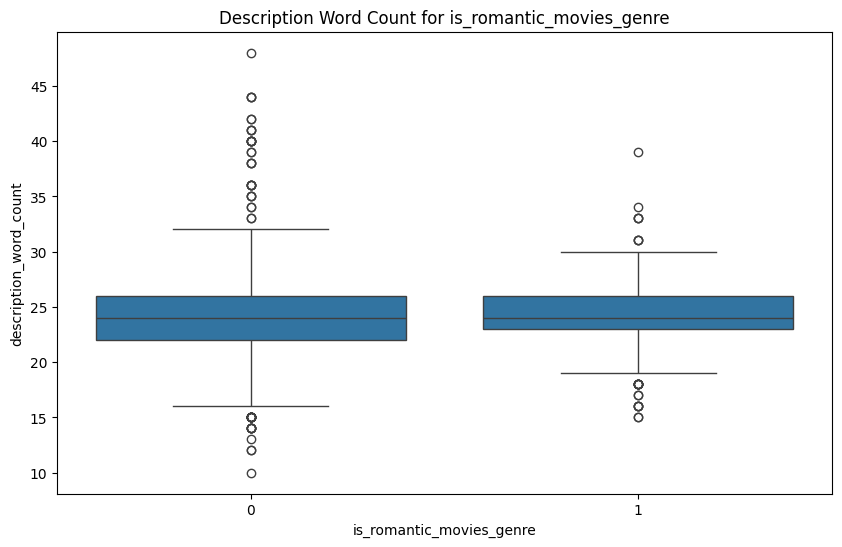

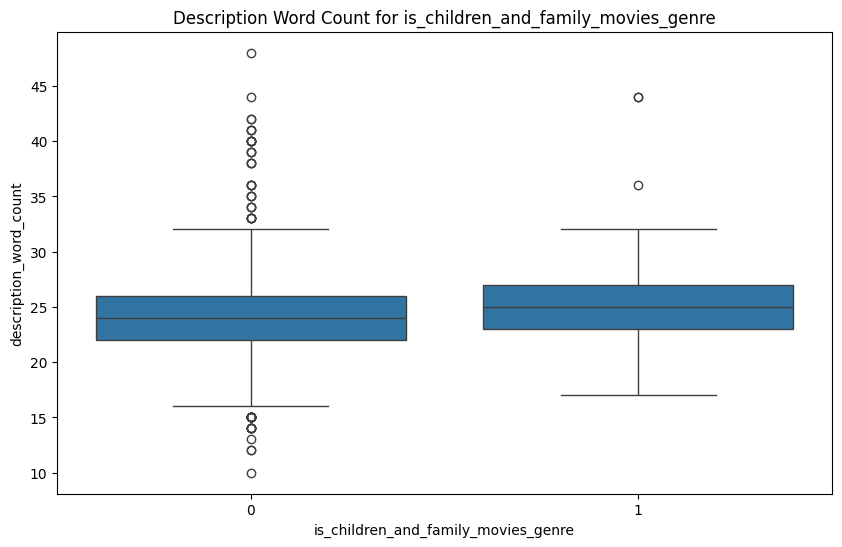

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

numerical_features = ['release_year', 'description_word_count', 'month_added', 'year_added', 'quarter_added'] + [col for col in df_cleaned.columns if col.startswith('is_')]
correlation_matrix = df_cleaned[numerical_features].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

strong_correlations = correlation_matrix[abs(correlation_matrix['release_year']) > 0.3]
print("Strong Correlations with Release Year:\n", strong_correlations['release_year'])

movie_description_length = df_cleaned[df_cleaned['type'] == 'Movie']['description_word_count']
tv_show_description_length = df_cleaned[df_cleaned['type'] == 'TV Show']['description_word_count']
t_statistic, p_value = stats.ttest_ind(movie_description_length, tv_show_description_length)
print(f"\nT-test for description word count (Movie vs. TV Show): t-statistic={t_statistic:.2f}, p-value={p_value:.3f}")

comedies_release_year = df_cleaned[df_cleaned['is_comedies_genre'] == 1]['release_year']
dramas_release_year = df_cleaned[df_cleaned['is_dramas_genre'] == 1]['release_year']
f_statistic, p_value = stats.f_oneway(comedies_release_year, dramas_release_year)
print(f"\nANOVA for release year (Comedies vs. Dramas): F-statistic={f_statistic:.2f}, p-value={p_value:.3f}")

plt.figure(figsize=(10, 6))
sns.boxplot(x='type', y='description_word_count', data=df_cleaned)
plt.title('Description Word Count by Content Type')
plt.show()

for genre in [col for col in df_cleaned.columns if col.startswith('is_')]:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=genre, y='description_word_count', data=df_cleaned)
    plt.title(f'Description Word Count for {genre}')
    plt.show()


## Summary of Key Findings

###  Correlation Analysis
- Matriks korelasi menunjukkan hubungan antara fitur numerik dan **tahun rilis**.
- Tidak ditemukan korelasi yang kuat dengan tahun rilis berdasarkan ambang korelasi 0.3.
- Diperlukan investigasi lanjutan dengan ambang batas yang berbeda, atau dengan fokus khusus pada korelasi genre tertentu.

---

### Statistical Significance Testing

**T-test:**  
- Terdapat perbedaan yang **secara statistik signifikan** dalam jumlah kata pada deskripsi antara film dan TV show.  
- Nilai p < 0.001, yang menunjukkan bahwa deskripsi film dan TV show cenderung memiliki panjang yang berbeda.

**ANOVA:**  
- Hasil ANOVA membandingkan tahun rilis antara genre **komedi dan drama**, dengan p-value sebesar 0.068.  
- Nilai ini mendekati ambang signifikansi umum (0.05), tetapi belum dianggap signifikan.  
- Analisis lebih lanjut atau penggunaan dataset yang lebih besar mungkin diperlukan untuk mengonfirmasi perbedaan tersebut.

---

### Grouped Analysis

- **Box plot** digunakan untuk memvisualisasikan distribusi jumlah kata dalam deskripsi berdasarkan tipe konten (film vs. TV show) dan per genre.
- Visualisasi ini membantu mengidentifikasi perbedaan dalam kecenderungan sentral (median), penyebaran data (variansi), serta outlier pada tiap kelompok.

---

### Overall Observations

- Fitur yang dihasilkan dari rekayasa fitur (seperti jumlah kata deskripsi dan indikator genre) menunjukkan potensi hubungan dengan variabel lain dalam dataset.
- Diperlukan eksplorasi lebih lanjut untuk melihat hubungan antara genre dan tahun rilis, serta kombinasi fitur menarik lainnya yang mungkin memiliki korelasi.


## Summary:

Berdasarkan hasil analisis data, tidak ditemukan korelasi yang kuat (di atas ambang 0.3) antara tahun rilis dengan fitur numerik lainnya dalam dataset. Hal ini menunjukkan bahwa tahun rilis tidak memiliki hubungan linier yang signifikan dengan variabel numerik lainnya. Dalam analisis perbedaan deskripsi antara jenis konten, ditemukan perbedaan yang signifikan secara statistik dalam jumlah kata pada deskripsi antara film dan acara TV, dengan nilai p < 0.001, yang menunjukkan bahwa kedua jenis konten cenderung memiliki gaya penulisan atau panjang deskripsi yang berbeda. Sementara itu, uji ANOVA terhadap distribusi tahun rilis antara genre komedi dan drama menunjukkan nilai p sebesar 0.068, yang berarti tidak terdapat perbedaan signifikan secara statistik pada tingkat signifikansi 0.05. Dari sisi kualitas data, ditemukan nilai yang hilang dalam jumlah cukup besar, terutama pada kolom 'director' (29.91%), serta kolom 'cast', 'country', 'date_added', 'rating', dan 'duration'. Untuk menangani hal ini, dilakukan imputasi menggunakan nilai 'Unknown', modus, atau penghapusan baris. Temuan-temuan ini memberikan wawasan penting mengenai struktur dan kualitas data, serta perbedaan karakteristik antar kategori dalam dataset.
